<a href="https://colab.research.google.com/github/valerian720/minimum_spanning_graph/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Создать программу, в которую подаётся на вход количество элементов графа X.
2. Заполнить граф случайным количеством рёбер со случайными значениями весов.
3. Вычислить минимальный остовной граф, вывести общую длинну остовного графа, проверить является исходный граф Гамильтоновым и Эйлеровым.

In [ ]:
import numpy as np

# only for visualization, but could be used to study graphs
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#@markdown input params
graph_sise = 10 #@param {type: "slider", min: 2, max: 100}
min_value = 0 #@param {type: "slider", min: 0, max: 100}
max_value = 10 #@param {type: "slider", min: 0, max: 100}
threshold = 3 #@param {type: "slider", min: 0, max: 100}

In [ ]:
#@markdown class Graph
class Graph:
    def __init__(self, num_of_nodes, min_value, max_value, threshold):
        self.m_num_of_nodes = num_of_nodes

        # create random weights of graph
        self.adjacency_matrix = np.random.randint(min_value,max_value,(num_of_nodes,num_of_nodes))
        self.adjacency_matrix[self.adjacency_matrix <= threshold] = 0
        print("adjacency_matrix:\n", self.adjacency_matrix)
        self.m_graph = []
        self.mst = []

        # add edges
        [[self.add_edge(i, j, self.adjacency_matrix[i, j]) if self.adjacency_matrix[i, j] > 0 and i != j else 0 for j in range(num_of_nodes)] for i in range(num_of_nodes)]
        print(f"edges ({len(self.m_graph)}):\n",self.m_graph)

    def add_edge(self, node1, node2, weight):
        self.m_graph.append([node1, node2, weight])

    def find_subtree(self, parent, i):
      if parent[i] == i:
          return i
      return self.find_subtree(parent, parent[i])

    def connect_subtrees(self, parent, subtree_sizes, x, y):
        xroot = self.find_subtree(parent, x)
        yroot = self.find_subtree(parent, y)
        if subtree_sizes[xroot] < subtree_sizes[yroot]:
            parent[xroot] = yroot
        elif subtree_sizes[xroot] > subtree_sizes[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            subtree_sizes[xroot] += 1  

    def min_spanning_graph(self):
        # Resulting tree
        result = []
        
        # Iterator
        i = 0
        # Number of edges in MST
        e = 0

        # Sort edges by their weight
        self.m_graph = sorted(self.m_graph, key=lambda item: item[2])
        
        # Auxiliary arrays
        parent = []
        subtree_sizes = []

        # Initialize `parent` and `subtree_sizes` arrays
        for node in range(self.m_num_of_nodes):
            parent.append(node)
            subtree_sizes.append(0)

        # Important property of MSTs
        # number of egdes in a MST is 
        # equal to (m_num_of_nodes - 1)
        while e < (self.m_num_of_nodes - 1):
            # Pick an edge with the minimal weight
            node1, node2, weight = self.m_graph[i]
            i = i + 1

            x = self.find_subtree(parent, node1)
            y = self.find_subtree(parent, node2)

            if x != y:
                e = e + 1
                result.append([node1, node2, weight])
                self.connect_subtrees(parent, subtree_sizes, x, y)

        self.mst = result
        # 
        spanning_length = 0
        # 
        # Print the resulting MST
        for node1, node2, weight in result:
            print(f"{node1} - {node2}: {weight}")
            spanning_length += weight
            # 
        print("minimum spanning graph length: ", spanning_length)

In [ ]:
class Hamiltonian:
    def __init__(self, graph):
        self.start = 0
        self.adjacency_matrix = graph.adjacency_matrix
        self.m_num_of_nodes = graph.m_num_of_nodes
        # list to store the cycle path
        self.cycle = []
        self.visited = [0 for x in range(self.m_num_of_nodes)]
 
        # variable to mark if graph has the cycle
        self.hasCycle = False
 
    # method to initiate the search of cycle
    def findCycle(self):
        print("finding...")
        # add starting vertex to the list
        self.cycle.append(self.start)
 
        # start the search of the hamiltonian cycle
        self.solve(self.start)
 
    # recursive function to implement backtracking
    def solve(self, vertex):
        # Base condition: if the vertex is the start vertex
        # and all nodes have been visited (start vertex twice)
        if vertex == self.start and len(self.cycle) == self.m_num_of_nodes + 1:
            self.hasCycle = True
            print("cycle:", self.cycle)

            return True # break all the recursion becouse we found one
            # return False # return to explore more cycles
 
        # iterate through the neighbor vertices
        for i in range(self.m_num_of_nodes):
            if self.adjacency_matrix[vertex][i] > 0 and self.visited[i] == 0:
                nbr = i
                # visit and add vertex to the cycle
                self.visited[nbr] = 1
                self.cycle.append(nbr)
 
                # traverse the neighbor vertex to find the cycle
                can_break = self.solve(nbr)

                if can_break:
                    return True

                # Backtrack
                self.visited[nbr] = 0
                self.cycle.pop()
        return False

In [ ]:
class Eulerian:
    def __init__(self, graph):
        self.m_graph = graph.m_graph
        self.m_num_of_nodes = graph.m_num_of_nodes

        self.in_degree = np.full(self.m_num_of_nodes, 0)
        self.out_degree = np.full(self.m_num_of_nodes, 0)

        self.hasCycle = False

    # https://codeforces.com/blog/entry/56654?locale=ru
    def checkCycle(self):
        for node1, node2, weight in self.m_graph:
            self.out_degree[node1] += 1
            self.in_degree[node2] += 1
        is_stongly_connectd = np.all(self.out_degree > 0) and np.all(self.in_degree > 0) # ?
        self.hasCycle = is_stongly_connectd and sum(self.in_degree) == sum(self.out_degree)
        print("in degree: ", self.in_degree)
        print("out degree: ", self.out_degree)
    


In [ ]:
# only for visualization
def print_graph(graph_edges):
    G = nx.Graph()
    G.add_weighted_edges_from(graph_edges)

    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [ ]:
# create random graph
random_graph = Graph(graph_sise, min_value, max_value, threshold)

adjacency_matrix:
 [[8 6 0 7 4 5 9 9 0 0]
 [7 0 0 8 4 0 0 0 9 5]
 [7 9 6 8 9 0 0 0 0 0]
 [8 0 0 6 7 4 0 0 0 0]
 [4 7 5 6 0 6 6 0 8 4]
 [6 7 5 6 5 5 0 7 4 6]
 [0 7 0 6 0 0 6 8 0 9]
 [6 0 4 8 6 8 9 0 4 8]
 [6 0 0 0 4 8 4 0 5 0]
 [7 7 0 0 0 6 6 5 7 7]]
edges (56):
 [[0, 1, 6], [0, 3, 7], [0, 4, 4], [0, 5, 5], [0, 6, 9], [0, 7, 9], [1, 0, 7], [1, 3, 8], [1, 4, 4], [1, 8, 9], [1, 9, 5], [2, 0, 7], [2, 1, 9], [2, 3, 8], [2, 4, 9], [3, 0, 8], [3, 4, 7], [3, 5, 4], [4, 0, 4], [4, 1, 7], [4, 2, 5], [4, 3, 6], [4, 5, 6], [4, 6, 6], [4, 8, 8], [4, 9, 4], [5, 0, 6], [5, 1, 7], [5, 2, 5], [5, 3, 6], [5, 4, 5], [5, 7, 7], [5, 8, 4], [5, 9, 6], [6, 1, 7], [6, 3, 6], [6, 7, 8], [6, 9, 9], [7, 0, 6], [7, 2, 4], [7, 3, 8], [7, 4, 6], [7, 5, 8], [7, 6, 9], [7, 8, 4], [7, 9, 8], [8, 0, 6], [8, 4, 4], [8, 5, 8], [8, 6, 4], [9, 0, 7], [9, 1, 7], [9, 5, 6], [9, 6, 6], [9, 7, 5], [9, 8, 7]]


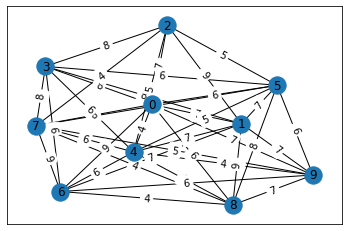

In [ ]:
print_graph(random_graph.m_graph)
# print(random_graph.m_graph)

In [ ]:
# calculate minimum spanning graph
random_graph.min_spanning_graph()

0 - 4: 4
1 - 4: 4
3 - 5: 4
4 - 9: 4
5 - 8: 4
7 - 2: 4
7 - 8: 4
8 - 4: 4
8 - 6: 4
minimum spanning graph length:  36


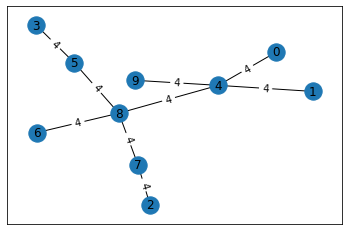

In [ ]:
print_graph(random_graph.mst)
# print(random_graph.mst)

In [ ]:
ham = Hamiltonian(random_graph)
ham.findCycle()
print("has Hamiltonian cycle: ", ham.hasCycle)

finding...
cycle: [0, 1, 3, 4, 5, 8, 6, 9, 7, 2, 0]
has Hamiltonian cycle:  True


In [ ]:
eul = Eulerian(random_graph)
eul.checkCycle()
print("has Eulerian cycle: ", eul.hasCycle)

in degree:  [8 6 3 7 7 6 5 4 5 5]
out degree:  [6 5 4 3 8 8 4 8 4 6]
has Eulerian cycle:  True
